# Process data and compare populations.
(for now just histograms)

###### Import libraries and imported data from last program

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df15 = pd.read_pickle('RefPers15')
df09 = pd.read_pickle('RefPers09')

In [5]:
# combine two years into one dataset
frames = [df09, df15]
df_2y = pd.concat(frames)

#### Recode vars:  

In [8]:
'''
1. Change format to numeric so we can analyze we will use in analysis
2. Rename analysis variables to more easily understand in later anlaysis
'''

df_2y['UnempWks'] = df_2y['nwlkwk'].astype('int')
df_2y['Age'] = df_2y['a_age'].astype('int')
df_2y['Sex'] = df_2y['a_sex'].astype('int')
df_2y['Educ'] = df_2y['a_hga'].astype('int')
df_2y['Race'] = df_2y['prdtrace'].astype('int')
df_2y['Hisp'] = df_2y['pehspnon'].astype('int')
df_2y['Military'] = df_2y['peafever'].astype('int')
df_2y['LbforStat'] = df_2y['a_lfsr'].astype('int')

# Create Long Term Unemployed variable to compare populations
df_2y['LTunemp'] = np.where(df_2y['UnempWks']>=27, 'yes', 'no')
df_2y['LTunempN'] = np.where(df_2y['UnempWks']>=27, 1, 0)


In [ ]:
# check for outliers and missing or wierd values

df_2y.describe()

#### Histogram to compare the age distribution of the long-term unemployed and the rest of the population

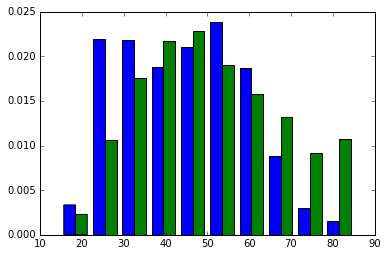

In [32]:
# create series to graph
LT = df_2y[df_2y['LTunemp'] == 'yes']
NotLT = df_2y[df_2y['LTunemp'] == 'no']

xLT=xLT.reset_index(drop=True)
xNotLT=xNotLT.reset_index(drop=True)


# format chart
n_bins = 10
Varlabs = ['LongTerm_age' ,'all_ages']

# create graph
plt.hist([xLT,xNotLT], normed=True, histtype='bar', label=['LongTerm_age' ,'all_ages'])
plt.show()